In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
values = {
    'analog' : [],
    'multimeter' : []
}

In [38]:
analog_read = float(input("Masukkan data analog : "))
ph_data = float(input("Masukkan data multimeter : "))

values['analog'].append(analog_read)
values['multimeter'].append(ph_data)

df = pd.DataFrame(values)
df.to_csv('../current.csv', index=False)
df.tail(2)

,analog,multimeter
33,543.35,1.67
34,558.25,2.40


In [2]:
df_mA = pd.read_csv('../current200mA.csv')
df_A = pd.read_csv('../current20A.csv')

In [51]:
df_mA

,analog,multimeter
0,509.17,83.8
1,509.25,84.5
2,509.32,88.7
3,509.37,89.5
4,509.55,96.4
5,509.54,97.5
6,509.58,97.5
7,509.69,101.3
8,509.77,103.0
9,509.80,106.2


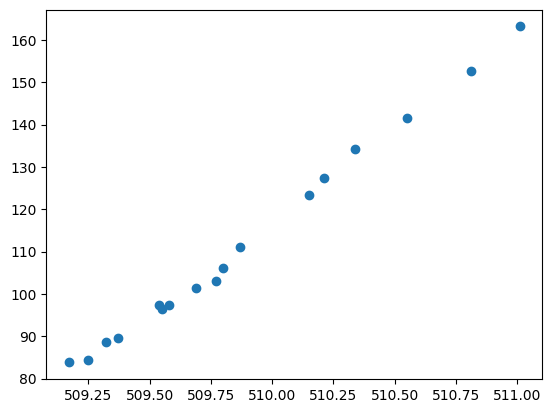

In [47]:
plt.scatter(df_mA['analog'], df_mA['multimeter'])


In [49]:
df_A

,511.16,0.1
0,513.37,0.20
1,515.34,0.30
2,517.56,0.41
3,519.82,0.51
4,522.71,0.66
5,524.74,0.75
6,527.21,0.87
7,528.84,0.95
8,529.93,1.02
9,535.23,1.28


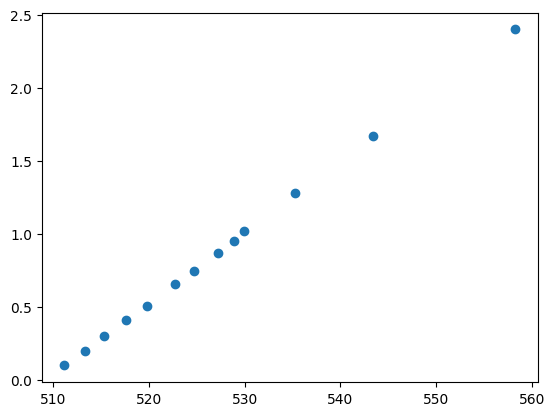

In [52]:
plt.scatter(df_A['analog'], df_A['multimeter'])

In [57]:
df_mA['multimeter'] = df_mA['multimeter'] / 1000

In [56]:
df

,analog,multimeter
0,509.17,83.80
1,509.25,84.50
2,509.32,88.70
3,509.37,89.50
4,509.55,96.40
5,509.54,97.50
6,509.58,97.50
7,509.69,101.30
8,509.77,103.00
9,509.80,106.20


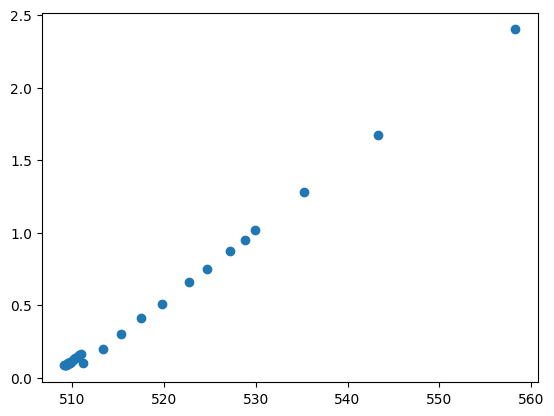

In [58]:
df = pd.concat([df_mA, df_A], axis=0)
plt.scatter(df['analog'], df['multimeter'])

coefficient of determination: 0.9999041422034949
intercept: -24.944444156765247
slope: [0.04898098]
-24.944444156765247 + 0.04898098345792092 * analog


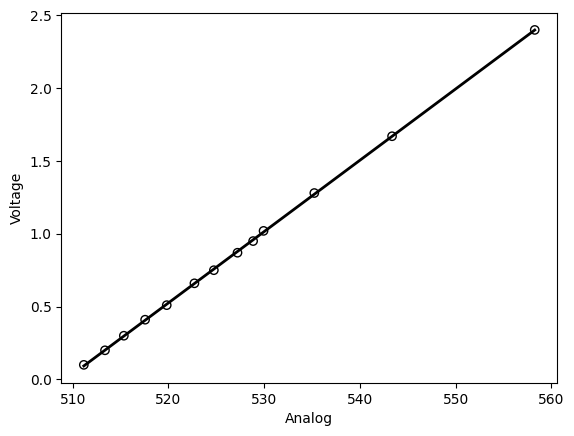

In [3]:
x_current = df_A["analog"].to_numpy().reshape((-1, 1))
y_current = df_A["multimeter"].to_numpy()
model = LinearRegression()
model.fit(x_current, y_current)
model = LinearRegression().fit(x_current, y_current)
r_sq = model.score(x_current, y_current)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred_current = model.intercept_ + model.coef_ * x_current
print(f"{model.intercept_} + {model.coef_[0]} * analog")
plt.scatter(x_current, y_current, facecolors='none', edgecolors='k')
plt.xlabel('Analog')
plt.ylabel('Voltage')
plt.plot(x_current, y_pred_current, color='k', linewidth=2)
plt.savefig('../docs 2nd Approach/img/regression_current.png')
# plt.xlim(0, 4095)
# plt.ylim(0,25)
plt.show()

